In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

%matplotlib inline
sns.set_style("whitegrid")


In [3]:
fashion_train_df = pd.read_csv('./data/fashion-mnist-train-1.csv')
fashion_test_df = pd.read_csv('./data/fashion-mnist_test.csv')

print("Training data shape: {}".format(fashion_train_df.shape))
print("Test data shape: {}".format(fashion_test_df.shape))

Training data shape: (14999, 785)
Test data shape: (10000, 785)


In [4]:
data_line = fashion_test_df.loc[:1]

In [8]:
line = data_line.values.tolist()

In [9]:
print(line)

[[0, 0, 0, 0, 0, 0, 0, 0, 9, 8, 0, 0, 34, 29, 7, 0, 11, 24, 0, 0, 3, 3, 1, 0, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 44, 88, 99, 122, 123, 80, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 46, 174, 249, 67, 0, 94, 210, 61, 14, 212, 157, 37, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 23, 168, 206, 242, 239, 238, 214, 125, 61, 113, 74, 133, 236, 238, 236, 203, 184, 20, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 175, 245, 223, 207, 205, 206, 216, 255, 237, 251, 232, 223, 212, 200, 205, 216, 249, 173, 0, 0, 2, 0, 0, 0, 0, 7, 0, 53, 225, 201, 197, 200, 201, 206, 199, 197, 185, 194, 204, 232, 226, 249, 219, 194, 205, 229, 33, 0, 1, 0, 0, 0, 0, 1, 0, 133, 223, 208, 192, 195, 233, 226, 216, 191, 210, 188, 236, 186, 0, 50, 234, 207, 208, 231, 133, 0, 0, 0, 0, 0, 0, 0, 0, 216, 218, 216, 194, 229, 172, 64, 219, 201, 200, 200, 247, 68, 72, 54, 165, 237, 212, 219, 226, 0, 0, 0, 0, 0, 0, 0, 50, 221, 207, 220, 211, 207, 165, 138, 205, 192, 191, 190, 232, 119, 113, 67, 173, 237, 217, 208, 221, 29, 

In [32]:
fashion_train_df.label.value_counts()

7    1557
0    1534
3    1528
6    1508
9    1506
1    1503
8    1487
5    1480
2    1461
4    1435
Name: label, dtype: int64

In [33]:
train = np.array(fashion_train_df, dtype='float32')
test = np.array(fashion_test_df, dtype='float32')

In [6]:
labels={'0':'T-shirt/top', '1': 'Trouser', '2' :'Pullover', '3':'Dress', '4': 'Coat', 
        '5': 'Sandal', '6': 'Shirt', '7': 'Sneaker', '8': 'Bag', '9': 'Ankle boot'} 

Text(0.5, 1.0, 'Pullover')

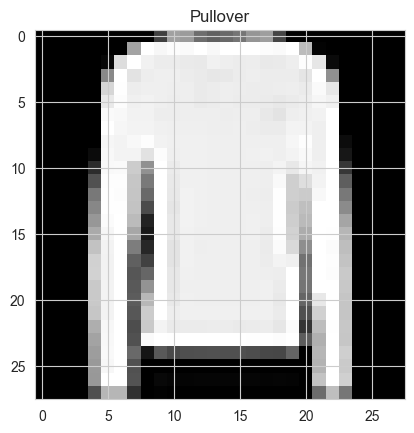

In [35]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Let's view some images!
i = random.randint(1,14999) # select any random index from 1 to 60,000
plt.imshow(train[i,1:].reshape((28,28))) # reshape and plot the image

plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image
label_index = fashion_train_df["label"][i]
plt.title(f"{class_names[label_index]}")

In [36]:
label = train[i,0]
label

2.0

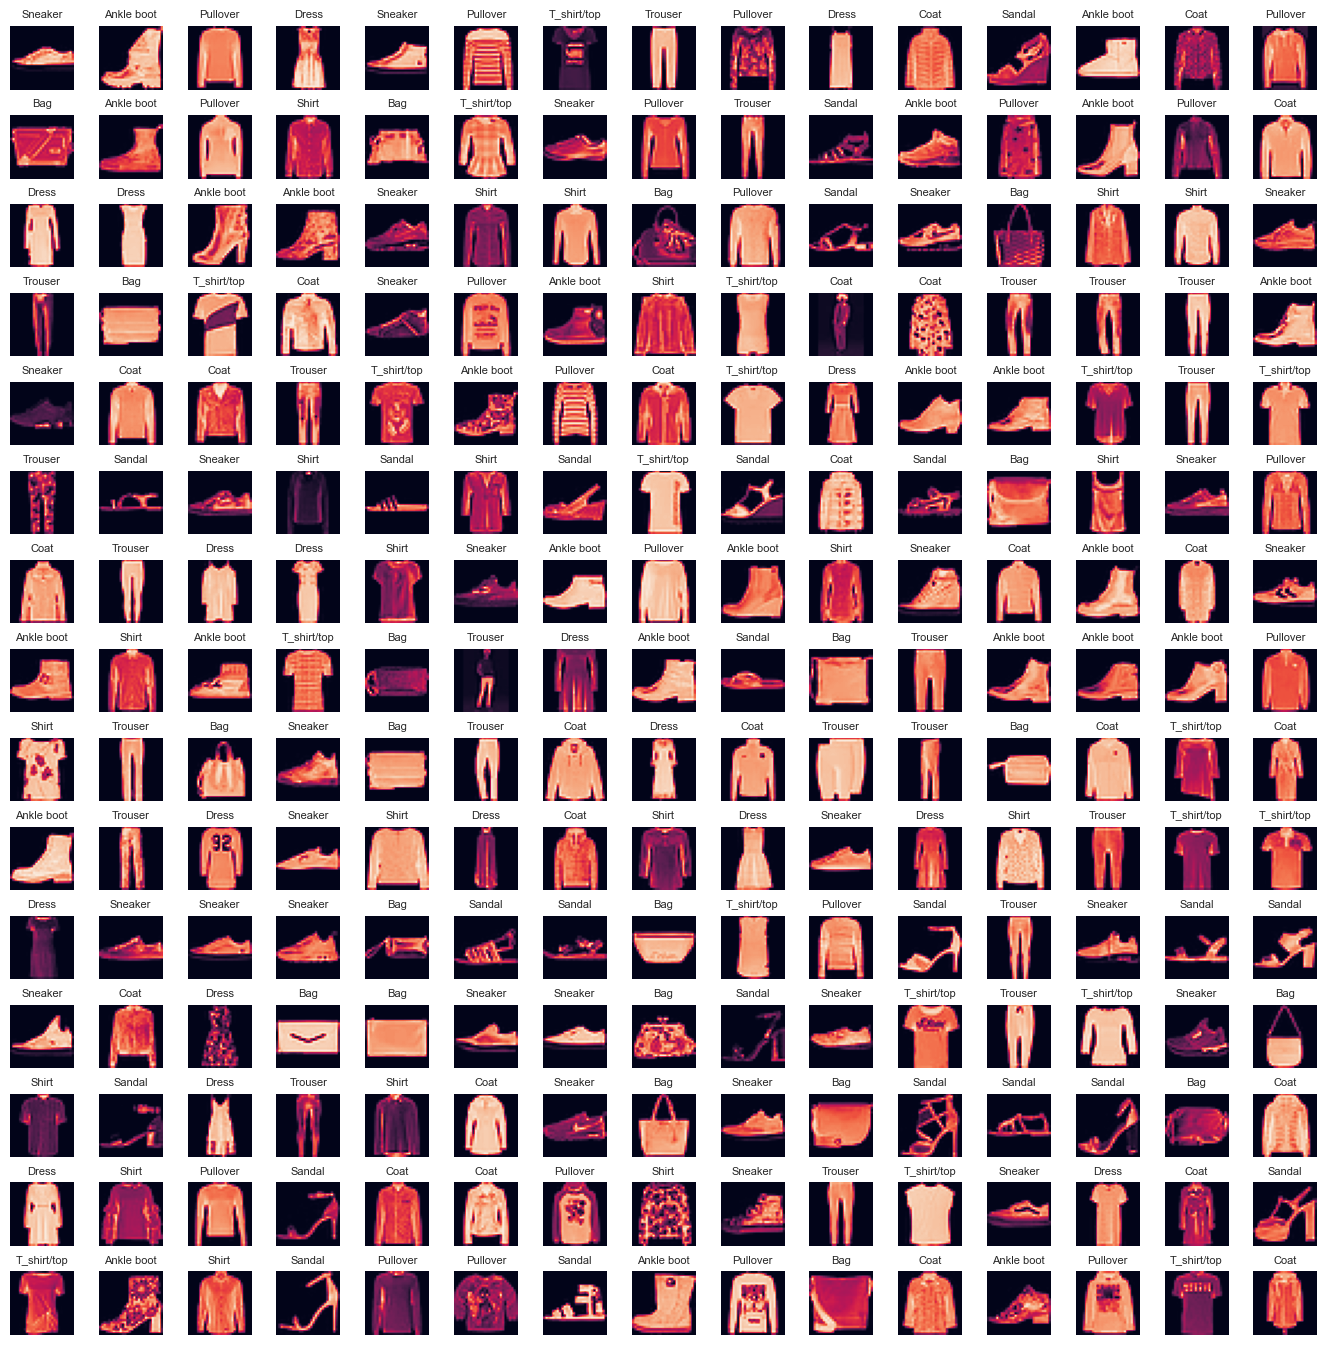

In [37]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [38]:
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

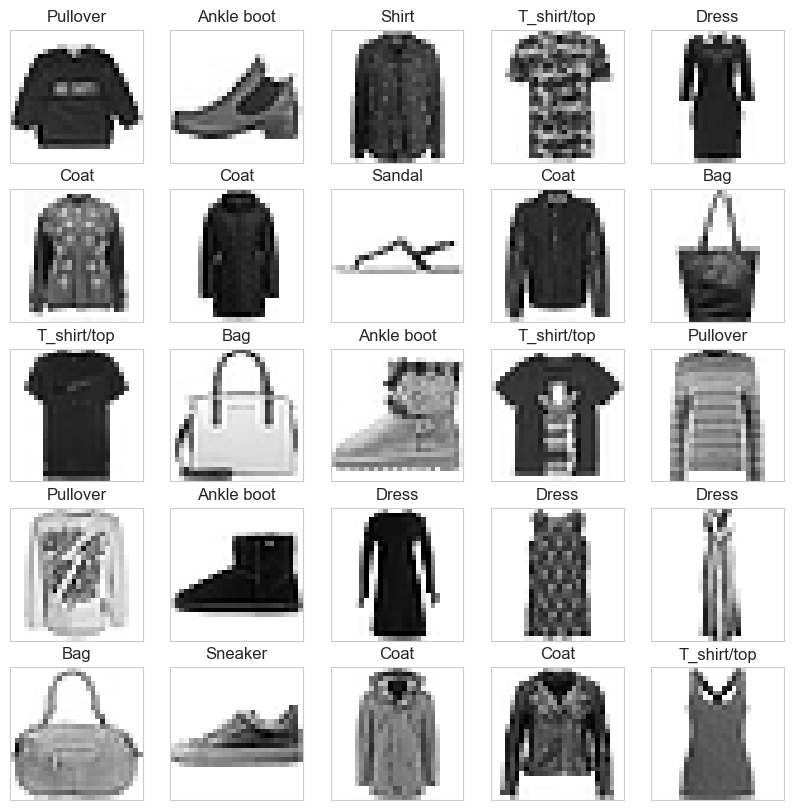

<Figure size 640x480 with 0 Axes>

In [39]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()
plt.tight_layout()

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape)
print(y_train.shape)

(9599, 784)
(9599,)


In [43]:
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28, 28, 1))

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(9599, 28, 28, 1)
(9599,)
(2400, 28, 28, 1)
(2400,)


In [45]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [46]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

# cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [47]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [48]:
epochs = 50
batch_size = 512

history = cnn_model.fit(
    X_train, y_train, 
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(X_validate, y_validate)
)

Train on 9599 samples, validate on 2400 samples
Epoch 1/50


2023-01-28 17:08:50.024430: W tensorflow/c/c_api.cc:291] Operation '{name:'training/Adam/dense_3/kernel/v/Assign' id:1575 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_3/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_3/kernel/v, training/Adam/dense_3/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


9599/9599 [==============================] - ETA: 0s - loss: 1.3980 - acc: 0.6044

/usr/local/lib/python3.10/site-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-01-28 17:09:06.700314: W tensorflow/c/c_api.cc:291] Operation '{name:'loss/mul' id:951 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_3_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


9599/9599 [==============================] - 17s 2ms/sample - loss: 1.3980 - acc: 0.6044 - val_loss: 2.2505 - val_acc: 0.2671
Epoch 2/50
9599/9599 [==============================] - 16s 2ms/sample - loss: 0.5804 - acc: 0.7813 - val_loss: 2.2914 - val_acc: 0.1963
Epoch 3/50
9599/9599 [==============================] - 18s 2ms/sample - loss: 0.4878 - acc: 0.8183 - val_loss: 2.3120 - val_acc: 0.1875
Epoch 4/50
9599/9599 [==============================] - 18s 2ms/sample - loss: 0.4253 - acc: 0.8401 - val_loss: 2.5246 - val_acc: 0.1013
Epoch 5/50
9599/9599 [==============================] - 17s 2ms/sample - loss: 0.3802 - acc: 0.8544 - val_loss: 2.5199 - val_acc: 0.1079
Epoch 6/50
9599/9599 [==============================] - 17s 2ms/sample - loss: 0.3518 - acc: 0.8668 - val_loss: 2.5296 - val_acc: 0.1037
Epoch 7/50
9599/9599 [==============================] - 16s 2ms/sample - loss: 0.3204 - acc: 0.8802 - val_loss: 2.4335 - val_acc: 0.1800
Epoch 8/50
9599/9599 [==============================

Text(0.5, 1.0, 'Loss evolution')

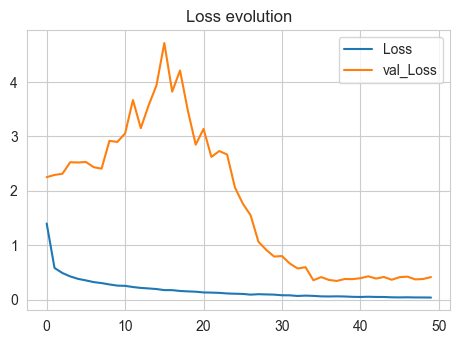

In [50]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

In [51]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

Test Accuracy : 0.905


In [52]:
# get the predictions for the test data
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

/usr/local/lib/python3.10/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-01-28 17:22:50.308841: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_3/Softmax' id:873 op device:{requested: '', assigned: ''} def:{{{node dense_3/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_3/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


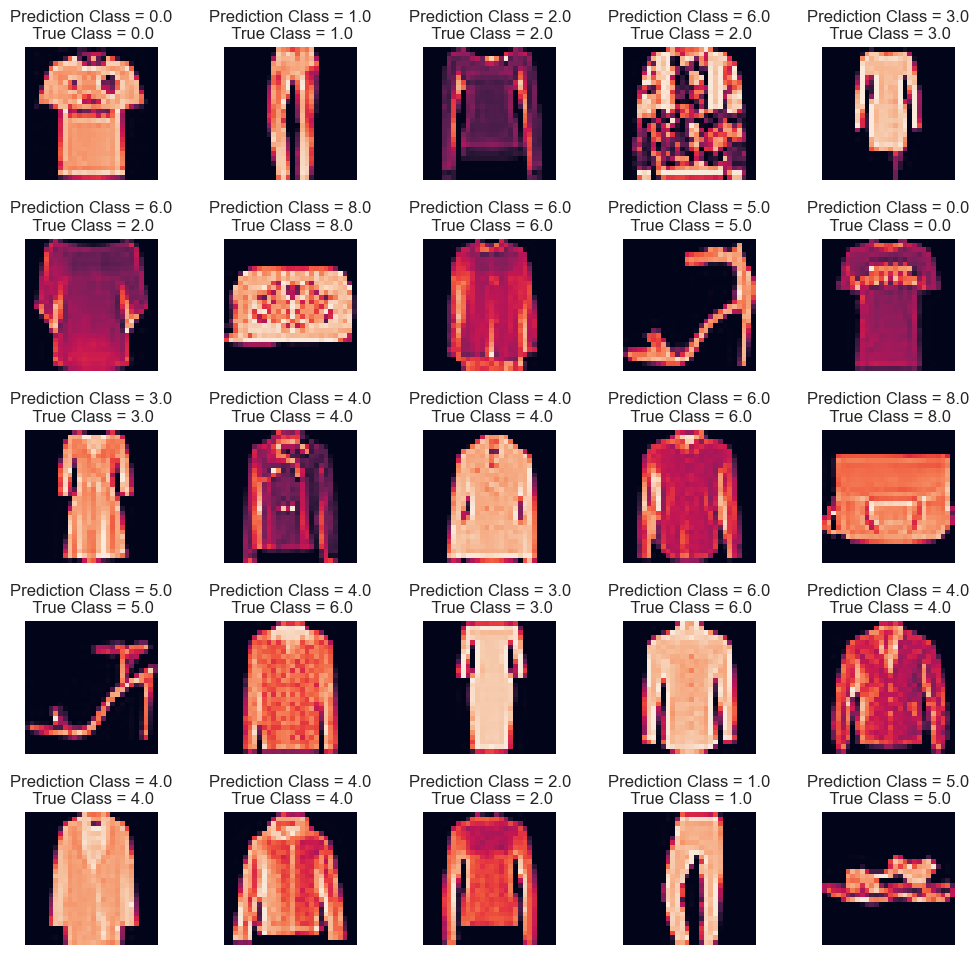

In [53]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {(predicted_classes[i]):0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [54]:
cnn_model.save("./model/model.h5")
print("Model saved")

Model saved
